**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

# Text preprocessing

In this assignment, you will implement Python functions that can be used in a sentiment analyzer to preprocess a text dataset.





**Environment Setup and Version Check:**    
No coding required in the following code - just run this cell to set up your environment.

- Verify Python environment and displays version information
- Installs required Python packages
- Downloads nltk resources
- Imports necessary Python libraries


In [2]:
import sys
print(f"Python version: {sys.version}")

# Import and setup NLTK
import nltk
print(f"NLTK version: {nltk.__version__}")

print("\nDownloading required NLTK resources...")
# Resources specifically needed for Python 3.11 in Colab
resources = [
    'punkt',
    'punkt_tab',
    'averaged_perceptron_tagger',
    'averaged_perceptron_tagger_eng',  # Specifically needed for Python 3.11
    'wordnet',
    'stopwords',
    'omw-1.4'
]

for resource in resources:
    print(f"Downloading {resource}...")
    nltk.download(resource)

# Import other required libraries
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
import matplotlib.pyplot as plt
import seaborn as sns

print("\nSetup complete. Ready to process text.")

Python version: 3.9.6 (default, Feb  3 2024, 15:58:27) 
[Clang 15.0.0 (clang-1500.3.9.4)]
NLTK version: 3.9.1



[nltk_data] Downloading package punkt to /Users/hyh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/hyh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/hyh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/hyh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/hyh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hyh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/hyh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



Setup complete. Ready to process text.


**TextPreprocessor Class Definition**   

The following defines the main text preprocessing class and all it's method API's.  
A 'cheatsheet' of the common functions used in this assignment are also show in the following text cell.  
Follow the instructions in the code cell to complete and test your code.  You will replace all triple underscores (___) with your code.
<br>

    class TextPreprocessor:

    - def __init__(self):  
      """Initialize the text preprocessor with necessary tools"""
        self.stemmer = PorterStemmer()
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

    - def normalize_text(self, text):   
        """
        Normalize text by converting to lowercase, removing special characters,
        and standardizing whitespace
        Args:
            text (str): Input text

        Returns:
            str: Normalized text
        """

    - def tokenize_text(self, text):  
        """
        Tokenize text into individual words
        Args:
            text (str): Input text

        Returns:
            list: List of tokens
        """

    - def pos_tag_text(self, tokens):
        """
        Perform POS tagging on tokens
        Args:
            tokens (list): List of tokens

        Returns:
            list: List of (token, pos_tag) tuples
        """

    - def remove_stopwords(self, tokens):
        """
        Remove stopwords from tokens
        Args:
            tokens (list): List of tokens

        Returns:
            list: List of tokens with stopwords removed
        """

    - def stem_tokens(self, tokens):
        """
        Apply stemming to tokens
        Args:
            tokens (list): List of tokens

        Returns:
            list: List of stemmed tokens
        """

    - def lemmatize_with_pos(self, tagged_tokens):
        """
        Lemmatize tokens using POS information
        Args:
            tagged_tokens (list): List of (token, pos_tag) tuples

        Returns:
            list: List of lemmatized tokens
        """

    - def preprocess_text(self, text, use_stemming=False):
        """
        Complete preprocessing pipeline
        Args:
            text (str): Input text
            use_stemming (bool): Whether to use stemming instead of lemmatization

        Returns:
            dict: Dictionary containing results from each preprocessing step
        """

    - def analyze_pos_distribution(self, texts):  
        """
        Analyze POS tag distribution in a collection of texts
        Args:
            texts (list): List of input texts

        Returns:
            dict: POS tag distribution
        """



**NLTK Cheatsheet - Common Functions and Classes**   
The following references and usage examples provide hints that can be used to complete the coding assignment.   

Official Documentation References
- NLTK Book: https://www.nltk.org/book/
- API Documentation: https://www.nltk.org/api/nltk.html

Key Module References
- Tokenizers: https://www.nltk.org/api/nltk.tokenize.html
- Stop Words: https://www.nltk.org/api/nltk.corpus.html#module-nltk.corpus.stopwords
- Porter Stemmer: https://www.nltk.org/api/nltk.stem.porter.html
- WordNet Lemmatizer: https://www.nltk.org/api/nltk.stem.wordnet.html
- POS Tagging: https://www.nltk.org/api/nltk.tag.html

Usage Examples
- Initial Setup
      import nltk
      from nltk.tokenize import word_tokenize, sent_tokenize
      from nltk.corpus import stopwords
      from nltk.stem import PorterStemmer, WordNetLemmatizer
      from nltk.tag import pos_tag

      # Download required NLTK data
      nltk.download('punkt')           # For tokenization
      nltk.download('stopwords')       # For stopwords
      nltk.download('averaged_perceptron_tagger')  # For POS tagging
      nltk.download('wordnet')         # For lemmatization

- Tokenization
  - Sentence Tokenization (sent_tokenize)   
        # Split text into sentences
        text = "This is sentence one. This is sentence two! Are we done yet?"
        sentences = sent_tokenize(text)
        # Result: ['This is sentence one.', 'This is sentence two!', 'Are we done yet?']

        # Works with multiple languages
        from nltk.tokenize import sent_tokenize
        sentences = sent_tokenize(text, language='english')  # Default is English

  - Word Tokenization (word_tokenize)   
        # Split text into words
        text = "Let's break this sentence into words!"
        words = word_tokenize(text)
        # Result: ['Let', "'s", 'break', 'this', 'sentence', 'into', 'words', '!']

        # Handles contractions and punctuation
        # More sophisticated than simple string.split()

- Stop Words
      # Get English stop words
      stop_words = set(stopwords.words('english'))

      # Check if a word is a stop word
      word = "the"
      is_stop = word in stop_words  # Returns True

      # Remove stop words from text
      text_tokens = word_tokenize("The quick brown fox jumps over the lazy dog")
      filtered_tokens = [word for word in text_tokens if word.lower() not in stop_words]
      # Result: ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']

- Stemming with PorterStemmer
      # Initialize stemmer
      ps = PorterStemmer()

      # Single word stemming
      ps.stem('running')     # Result: 'run'
      ps.stem('happiness')   # Result: 'happi'
      ps.stem('artificial')  # Result: 'artifici'

      # Stem a list of words
      words = ['running', 'runs', 'ran']
      stemmed = [ps.stem(word) for word in words]
      # Result: ['run', 'run', 'ran']

      # Note: Stemming can produce non-dictionary words
      # Focus is on consistent root form, not necessarily valid words

- Lemmatization with WordNetLemmatizer
      # Initialize lemmatizer
      lemmatizer = WordNetLemmatizer()

      # Basic lemmatization (defaults to noun)
      lemmatizer.lemmatize('cities')     # Result: 'city'
      lemmatizer.lemmatize('wolves')     # Result: 'wolf'

      # Lemmatization with POS specification
      # Common POS tags: 'n' (noun), 'v' (verb), 'a' (adjective), 'r' (adverb)
      lemmatizer.lemmatize('better', pos='a')     # Result: 'good'
      lemmatizer.lemmatize('running', pos='v')    # Result: 'run'
      lemmatizer.lemmatize('running', pos='n')    # Result: 'running'

      # Note: Lemmatization produces valid dictionary words
      # More computationally intensive but linguistically accurate than stemming

- Part of Speech (POS) Tagging
      # Tag a sentence
      text = "The quick brown fox jumps over the lazy dog"
      tokens = word_tokenize(text)
      tagged = pos_tag(tokens)
      # Result: [('The', 'DT'), ('quick', 'JJ'), ('brown', 'JJ'), ('fox', 'NN'),
      #          ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'),
      #          ('dog', 'NN')]

      # Common POS Tags:
      # CC: Coordinating conjunction    # IN: Preposition
      # DT: Determiner                 # JJ: Adjective
      # NN: Noun (singular)            # NNS: Noun (plural)
      # RB: Adverb                     # VB: Verb (base form)
      # VBD: Verb (past tense)         # VBG: Verb (gerund)
      # VBN: Verb (past participle)    # VBP: Verb (present tense)
      # VBZ: Verb (3rd person sing.)   # PRP: Personal pronoun


In [1]:

class TextPreprocessor:
  def __init__(self):
    self.stemmer = PorterStemmer()
    self.lemmatizer = WordNetLemmatizer() # Corrected variable name
    self.stop_words = set(stopwords.words('english'))

  def normalize_text(self, text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

  def tokenize_text(self, text: str):
        return word_tokenize(text)

  def pos_tag_text(self, tokens):
        return pos_tag(tokens)

  def remove_stopwords(self, tokens):
        return [w for w in tokens if w not in self.stop_words]

  def stem_tokens(self, tokens):
        """Porter stemming"""
        return [self.stemmer.stem(w) for w in tokens]

  def lemmatize_with_pos(self, tagged_tokens):
        lemmatized = []
        for token, tag in tagged_tokens:
            if tag.startswith("N"):
                pos = "n"
            elif tag.startswith("V"):
                pos = "v"
            elif tag.startswith("R"):
                pos = "r"
            elif tag.startswith("J"):
                pos = "a"
            else:
                pos = "n"
            lemmatized.append(self.lemmatizer.lemmatize(token, pos))
        return lemmatized

  def preprocess_text(self, text: str, use_stemming: bool = False):

        results = {
            "original": text,
            "normalized": None,
            "tokenized": None,
            "pos_tagged": None,
            "no_stopwords": None,
            "final": None,
        }

        normalized = self.normalize_text(text)
        results["normalized"] = normalized

        tokens = self.tokenize_text(normalized)           
        results["tokenized"] = tokens

        tagged = self.pos_tag_text(tokens)                
        results["pos_tagged"] = tagged

        cleaned_tokens = self.remove_stopwords(tokens)    
        results["no_stopwords"] = cleaned_tokens

        if use_stemming:
            final_tokens = self.stem_tokens(cleaned_tokens)
        else:
            tagged_cleaned = self.pos_tag_text(cleaned_tokens)
            final_tokens = self.lemmatize_with_pos(tagged_cleaned)

        results["final"] = final_tokens
        return results

  def analyze_pos_distribution(self, texts):
        pos_counts = {}
        for text in texts:
            normalized = self.normalize_text(text)
            tokens = self.tokenize_text(normalized)
            tagged = self.pos_tag_text(tokens)
            for _, tag in tagged:
                pos_counts[tag] = pos_counts.get(tag, 0) + 1
        return pos_counts

**Example Usage and Visualization**

- Creates example product reviews for demonstration.  
- Creates visualization of Parts of Speech distribution.
- **DO NOT CHANGE THE FOLLOWING CELL - FOR VERIFICATION PURPOSES**


POS counts:
       count
CD        1
PRP$      1
JJS       1
VBN       2
VBG       2
PRP       2
NNS       2
VBD       2
VB        2
VBZ       3
CC        4
DT        5
IN        6
RB        6
JJ        7
NN       13


<Figure size 1200x600 with 0 Axes>

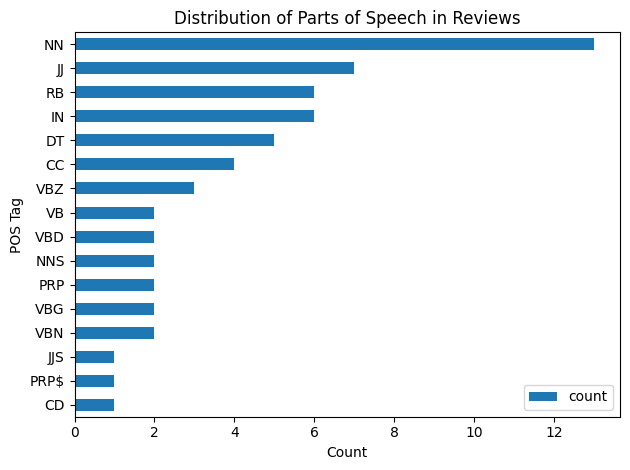

TestResults(failed=0, attempted=8)

In [3]:
# Sample product reviews
reviews = [
    "This product is amazing! I've been using it for months and it works perfectly.",
    "Terrible experience. The product broke after two days and customer service was unhelpful.",
    "Good product but a bit expensive. The quality is great though.",
    "Not worth the money. Save your cash and buy something else.",
    "Best purchase ever! Highly recommended for anyone looking for quality."
]

# Create sample dataset
df = pd.DataFrame({
    'review_text': reviews,
    'sentiment': [1, -1, 0, -1, 1]  # 1: positive, 0: neutral, -1: negative
})

# Initialize preprocessor
preprocessor = TextPreprocessor()

# Process a single review with both stemming and lemmatization for comparison
sample_review = df['review_text'].iloc[0]
results_stem = preprocessor.preprocess_text(sample_review, use_stemming=True)
results_lem = preprocessor.preprocess_text(sample_review, use_stemming=False)



# Analyze POS distribution
pos_dist = preprocessor.analyze_pos_distribution(df['review_text'])

# Visualize POS distribution
plt.figure(figsize=(12, 6))
pos_df = pd.DataFrame.from_dict(pos_dist, orient='index', columns=['count'])
pos_df.sort_values('count', ascending=True).plot(kind='barh')
print('POS counts:\n', pos_df.sort_values('count', ascending=True))
plt.title('Distribution of Parts of Speech in Reviews')
plt.xlabel('Count')
plt.ylabel('POS Tag')
plt.tight_layout()
plt.show()


import doctest
'''
  >>> print(results_stem['original'])
  This product is amazing! I've been using it for months and it works perfectly.
  >>> print(results_stem['normalized'])
  this product is amazing ive been using it for months and it works perfectly
  >>> print(results_stem['tokenized'])
  ['this', 'product', 'is', 'amazing', 'ive', 'been', 'using', 'it', 'for', 'months', 'and', 'it', 'works', 'perfectly']
  >>> print(results_stem['pos_tagged'])
  [('this', 'DT'), ('product', 'NN'), ('is', 'VBZ'), ('amazing', 'JJ'), ('ive', 'JJ'), ('been', 'VBN'), ('using', 'VBG'), ('it', 'PRP'), ('for', 'IN'), ('months', 'NNS'), ('and', 'CC'), ('it', 'PRP'), ('works', 'VBZ'), ('perfectly', 'RB')]
  >>> print(results_stem['no_stopwords'])
  ['product', 'amazing', 'ive', 'using', 'months', 'works', 'perfectly']
  >>> print(results_stem['final'])
  ['product', 'amaz', 'ive', 'use', 'month', 'work', 'perfectli']
  >>> print(results_lem['final'])
  ['product', 'amaze', 'ive', 'use', 'month', 'work', 'perfectly']
  >>> print(pos_df.sort_values('count', ascending=True).to_numpy().flatten())
  [ 1  1  1  2  2  2  2  2  2  3  4  5  6  6  7 13]
'''
doctest.testmod()

**Processing Multiple Reviews**   

Run the following 2 cells and reflect on the results.


In [8]:
def process_reviews(df, preprocessor, use_stemming=False):
    processed_reviews = []

    for review in df['review_text']:
        results = preprocessor.preprocess_text(review, use_stemming)
        processed_reviews.append(' '.join(results['final']))

    return processed_reviews

# Process with both methods
df['processed_stemming'] = process_reviews(df, preprocessor, use_stemming=True)
df['processed_lemmatization'] = process_reviews(df, preprocessor, use_stemming=False)

# Display results
print("Sample of processed reviews:")
print(df[['review_text', 'processed_stemming', 'processed_lemmatization']].head())

Sample of processed reviews:
                                         review_text  \
0  This product is amazing! I've been using it fo...   
1  Terrible experience. The product broke after t...   
2  Good product but a bit expensive. The quality ...   
3  Not worth the money. Save your cash and buy so...   
4  Best purchase ever! Highly recommended for any...   

                                  processed_stemming  \
0          product amaz ive use month work perfectli   
1  terribl experi product broke two day custom se...   
2       good product bit expens qualiti great though   
3               worth money save cash buy someth els   
4  best purchas ever highli recommend anyon look ...   

                             processed_lemmatization  
0         product amaze ive use month work perfectly  
1  terrible experience product break two day cust...  
2    good product bit expensive quality great though  
3           worth money save cash buy something else  
4  best purchase ever 

**Analysis of Preprocessing Impact**

<Figure size 1000x600 with 0 Axes>

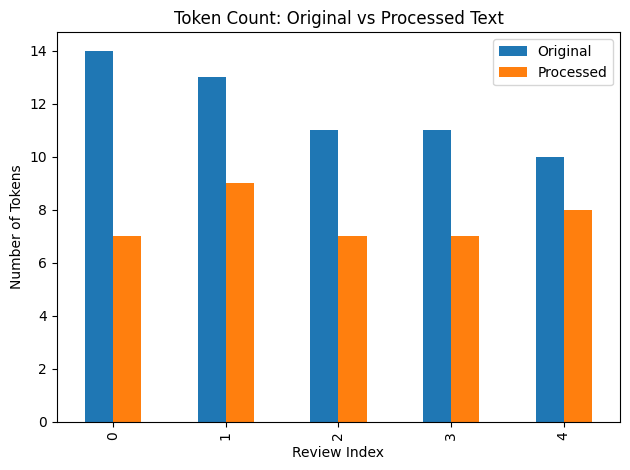


Preprocessing Statistics:
Average original length: 11.80 tokens
Average processed length: 7.60 tokens
Average reduction: 35.59%


In [9]:
# Analyze token length reduction
df['original_length'] = df['review_text'].str.split().str.len()
df['processed_length'] = df['processed_lemmatization'].str.split().str.len()

# Visualize length reduction
plt.figure(figsize=(10, 6))
df[['original_length', 'processed_length']].plot(kind='bar')
plt.title('Token Count: Original vs Processed Text')
plt.xlabel('Review Index')
plt.ylabel('Number of Tokens')
plt.legend(['Original', 'Processed'])
plt.tight_layout()
plt.show()

# Basic statistics
print("\nPreprocessing Statistics:")
print(f"Average original length: {df['original_length'].mean():.2f} tokens")
print(f"Average processed length: {df['processed_length'].mean():.2f} tokens")
print(f"Average reduction: {((df['original_length'].mean() - df['processed_length'].mean()) / df['original_length'].mean() * 100):.2f}%")

From the results of stemming and lemmatization, I find that the lemmatization result may be slightly more "readable" than the stemming result. But for both cases, the "senitimental" words are preserved, which would be helpful for the analysis.

From the bar chart of the original vs the processed text, I find that the processing reduced the text significantly by length, which may preserve the most "useful" information, while throw away the less "useful" ones.

**REFLECTION**   
Answer the following questions:


1.  Analysis of Text Reduction  
Examine the bar chart comparing original versus processed text lengths. In our example, we saw an average reduction of token count by approximately 40%. Explain why this reduction occurs and discuss whether this level of reduction might help or hinder sentiment analysis. Consider specific words that were removed and their potential importance to sentiment.
2.  Impact of Processing Choices  
Compare the results of stemming versus lemmatization in our processed reviews. Looking at specific examples from the output, identify cases where one method might be more appropriate than the other for sentiment analysis. What are the trade-offs between these approaches in terms of preserving meaning while standardizing words?
3.  Critical Evaluation of Pipeline  
Our preprocessing pipeline includes normalization, tokenization, POS tagging, stopword removal, and stemming/lemmatization. Looking at the final processed texts, identify any sentiment-bearing words that might have been lost or altered during preprocessing. How might you modify the pipeline to better preserve sentiment information while still maintaining the benefits of preprocessing?


1. Q: Analysis of Text Reduction: Examine the bar chart comparing original versus processed text lengths. In our example, we saw an average reduction of token count by approximately 40%. Explain why this reduction occurs and discuss whether this level of reduction might help or hinder sentiment analysis. Consider specific words that were removed and their potential importance to sentiment.

**My Ans:** I think it is because we have removed the stopwords and punctuations. This would be helpful since we don't need these stopwords for analysis. It "contracts" information and preserves the most useful ones. However, I find that some mistakes happen. For example, The origin text goes "**not** worth money", while after removing the stop words, the review becomes "worth money", which may hinder our analysis. So we may need to reset the stop words, instead of directly using the NLTK stop words.

   

2. Q: Impact of Processing Choices : Compare the results of stemming versus lemmatization in our processed reviews. Looking at specific examples from the output, identify cases where one method might be more appropriate than the other for sentiment analysis. What are the trade-offs between these approaches in terms of preserving meaning while standardizing words?

**My Ans:** From the above results, I find that lemmatization has a slightly "better" result in preserving the textual information than stemming. However, the trade-off is that lemmatization may preserve larger amount of data than stemming, and lemmatization might be less "normalized" than stemming.

3. Q: Critical Evaluation of Pipeline : Our preprocessing pipeline includes normalization, tokenization, POS tagging, stopword removal, and stemming/lemmatization. Looking at the final processed texts, identify any sentiment-bearing words that might have been lost or altered during preprocessing. How might you modify the pipeline to better preserve sentiment information while still maintaining the benefits of preprocessing?

 **My Ans:** Firstly, in order not to remove the negation words like "not" from the abbreviation, we can expand words like "don't" to "do not" at first. Secondly, in the example, the punctuations like "!" are removed. However, these might also preserves sentiments. Therefore, we can revise the step and preserve some punctuations such like the "!".